---

# University of Liverpool

## COMP534 - Applied AI

---

This notebook is associated with Assignment 1. Use it to complete the assignment by following the instructions provided in each section, which includes a text cell describing the requirements. For additional details, see the Canvas.

In [11]:
# import libraries here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score


# 1. **Data Management**


In this part, you need to:

1.   analyse and prepare the data. Use plots, graphs, and tables (such as histogram, box plots, scatterplots etc.) to better analyse the dataset and identify issues or potential improvements in the data, including (but not limited to) unnecessary feature/variable which can be dropped/removed, standardization, encoding, etc;
2.   split the data and define your experimental protocol (such as cross-validation or k-fold).

In [3]:
# First reaad in data set and assign valid parameter ranges based on the dataset description
df = pd.read_csv('data/assign1-grades.csv')

valid_school = ['GP', 'MS']
valid_sex = ['F', 'M']
valid_address = ['U', 'R']
valid_famsize = ['GT3', 'LE3']
valid_pstatus = ['T', 'A']
valid_reason = ['home', 'reputation', 'course', 'other']
valid_yes_no = ['yes', 'no']
valid_4scale = np.arange(5)
valid_5scale = np.arange(6)
valid_grade = np.arange(21)

minpass_grade = 12

# Ensure str columns are in the proper case 

upper_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus']
lower_columns = ['reason', 'guardian', 'schoolsup', 'famsup', 'paid',
                 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in upper_columns:
    df[col] = df[col].str.upper()

for col in lower_columns:
    df[col] = df[col].str.lower()

# Remove null and invalid data 

df = df[df['school'].isin(valid_school)]
df = df[df['sex'].isin(valid_sex)]
df = df[df['address'].isin(valid_address)]
df = df[df['famsize'].isin(valid_famsize)]
df = df[df['Pstatus'].isin(valid_pstatus)]
df = df[df['reason'].isin(valid_reason)]
df = df[df['Grade'].isin(valid_grade)]

scale4 = ['Medu', 'Fedu', 'traveltime', 'studytime']
scale5 = ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
yes_no = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
          'internet', 'romantic']

for col in scale4:
    df = df[df[col].isin(valid_4scale)]

for col in scale5:
    df = df[df[col].isin(valid_5scale)]

for col in yes_no:
    df = df[df[col].isin(valid_yes_no)]

# Create the target column of pass/fail based on min Grade

df['result'] = np.where(df['Grade'] >= minpass_grade, 'pass', 'fail')


Now that the initial validation is complete we can analyse the data set and look for outliers and irrelevant columns

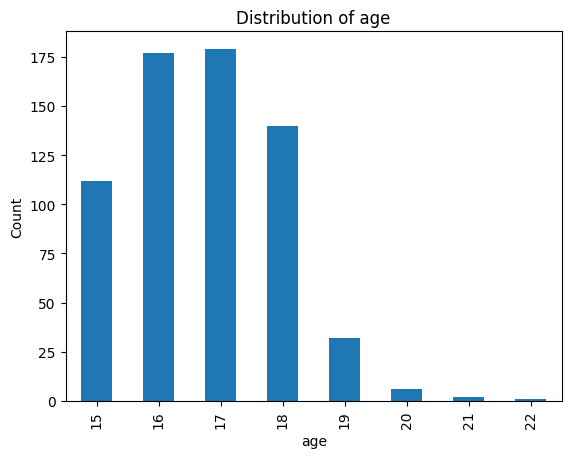

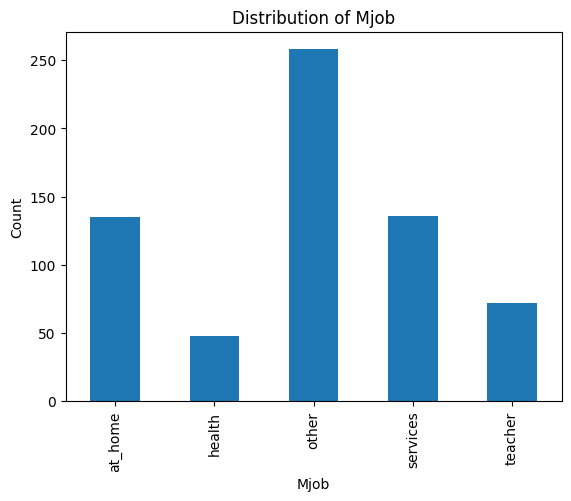

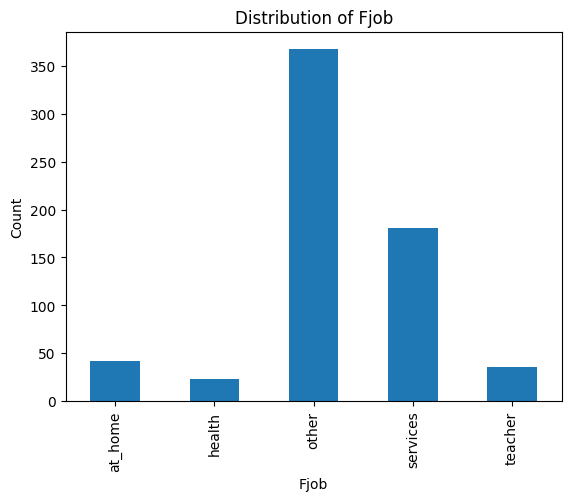

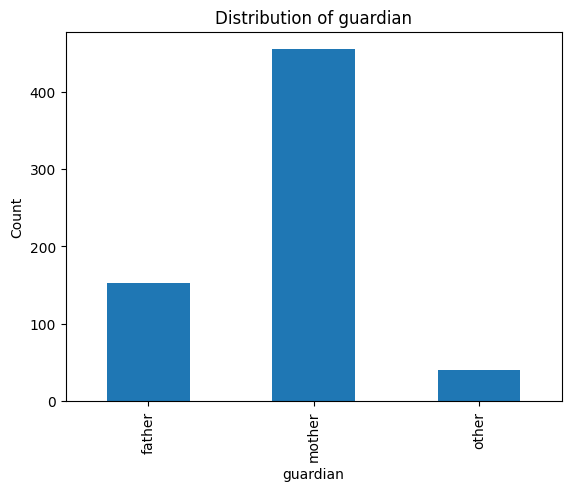

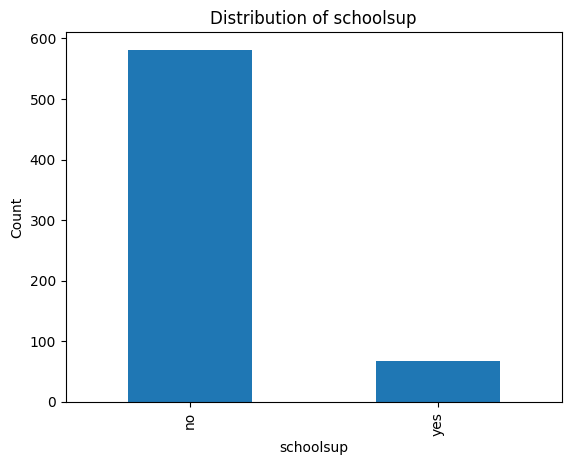

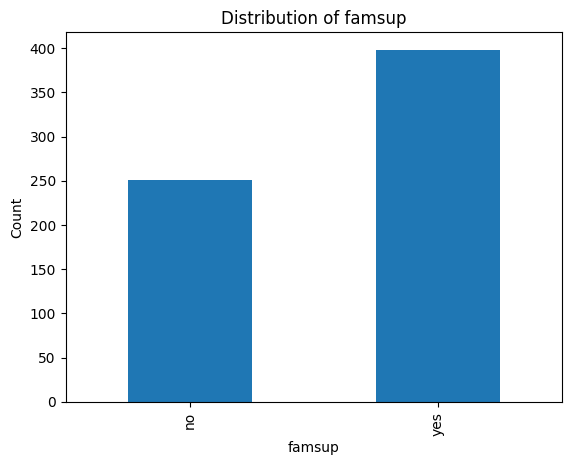

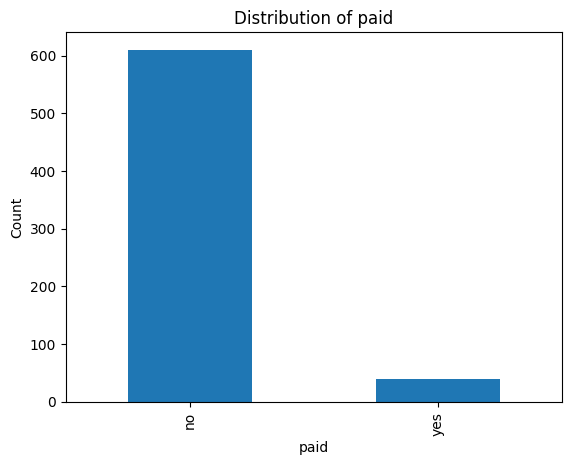

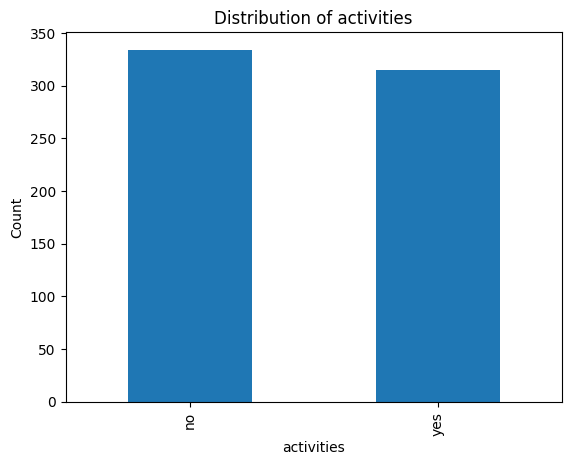

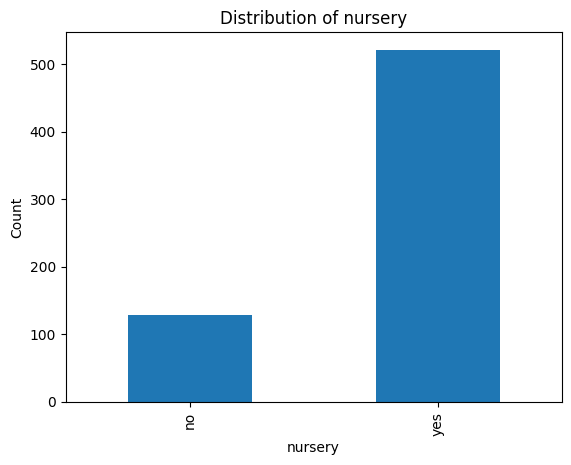

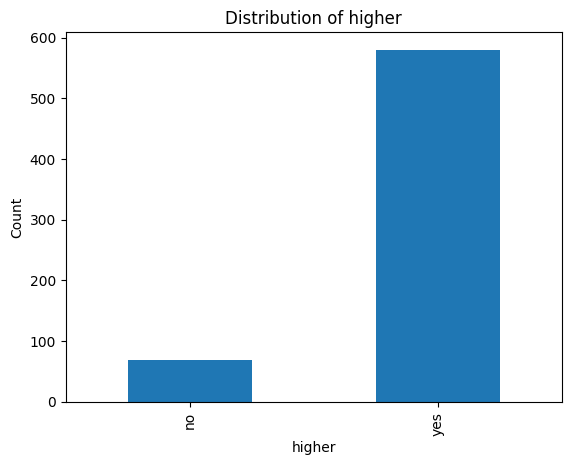

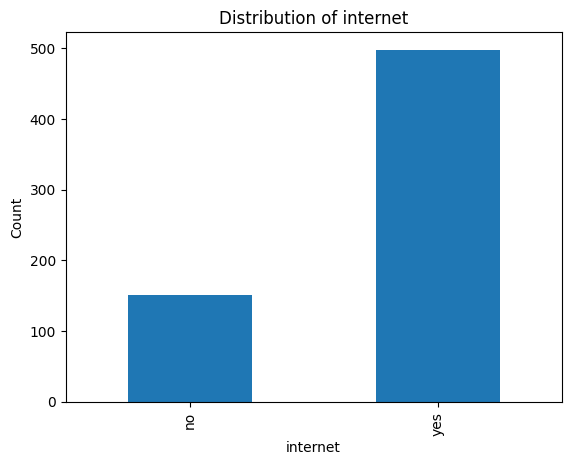

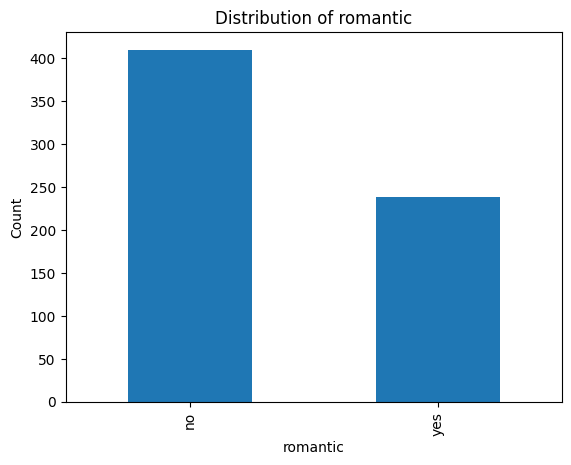

In [12]:
all_column = ['age', 'Mjob', 'Fjob', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
#all_column = df.columns.values()

# Give specific rows counts
for i in all_column:
    value_counts = df[i].value_counts().sort_index()
    #print(value_counts)

# Draw bar chart for each column
for column in all_column:
    data_counts = df[column].value_counts().sort_index()
    plt.figure()
    data_counts.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
# Remove outliers and unnecessary columns

df = df[df['age'] < 22]

df = df.drop['paid']
df = df.drop(columns=["Unnamed: 0"], errors="ignore") # dropping the index column

In [ ]:
# Now encode the data to allow for correlation analysis 

df[yes_no] = df[yes_no].apply(lambda x: x.map({'yes': 1, 'no': 0}))

binary_columns = ["school", "sex", "address", "famsize", "Pstatus", "result"]
df_encoded = pd.get_dummies(df, columns = binary_columns, drop_first= True ) #one-hot encoded (dummy) variables to handle binary str data

In [ ]:
# Split the data using the 5-fold method 
kfold = KFold(5, shuffle=True, random_state=42)

y = df['result_pass']
X = df.drop(['result_pass'])


TypeError: KFold.__init__() takes from 1 to 2 positional arguments but 3 were given

---

# 2. **Model Training**

Here, you need to:

1.	select and compare at least three machine learning models (seen/discussed during the lectures) appropriate for your modelling;
2.	if there are hyperparameters in a selected algorithm, define a hyperparameter search protocol (you can define your own), and tune them.


In [ ]:
# Write your proposed solution code here. Create more code cells if you find it necessary





---

# 3. **Evaluate models**

Here, you need to:

1.	test the model (the best one you obtained from the above stage) on the testing dataset.


In [ ]:
# Write your proposed solution code here. Create more code cells if you find it necessary



